In [1]:
pip install tensorflow keras sklearn matplotlib pandas pillow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Uros\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42


In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 62s 63ms/step - loss: 1.9329 - accuracy: 0.5279 - val_loss: 0.3736 - val_accuracy: 0.9060
Epoch 2/15
981/981 [==============================] - 75s 76ms/step - loss: 0.5010 - accuracy: 0.8582 - val_loss: 0.1270 - val_accuracy: 0.9679
Epoch 3/15
981/981 [==============================] - 70s 71ms/step - loss: 0.3051 - accuracy: 0.9148 - val_loss: 0.0829 - val_accuracy: 0.9777
Epoch 4/15
981/981 [==============================] - 66s 68ms/step - loss: 0.2663 - accuracy: 0.9271 - val_loss: 0.0690 - val_accuracy: 0.9823
Epoch 5/15
981/981 [==============================] - 61s 62ms/step - loss: 0.2341 - accuracy: 0.9365 - val_loss: 0.0653 - val_accuracy: 0.9815
Epoch 6/15
981/981 [==============================] - 62s 63ms/step - loss: 0.2118 - accuracy: 0.9432 - val_loss: 0.0992 - val_accuracy: 0.9740
Epoch 7/15
981/981 [==============================] - 64s 65ms/step - loss: 0.2210 - accuracy: 0.9440 - val_loss: 0.0590 - val_accuracy:

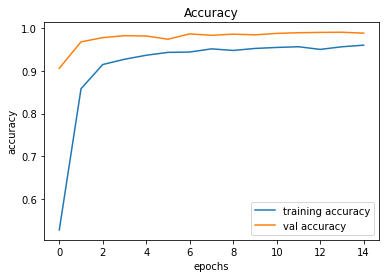

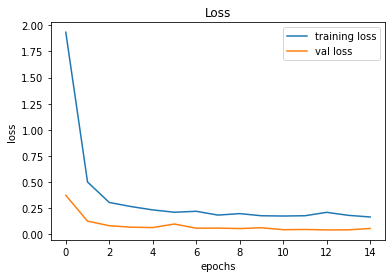

In [6]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

roi_x1 = y_test["Roi.X1"]
roi_x2 = y_test["Roi.Y1"]
roi_y1 = y_test["Roi.X2"]
roi_y2 = y_test["Roi.Y2"]

data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
pred = model.predict(X_test)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
# print(accuracy_score(labels, pred))

[0.00000000e+00 2.67893119e-27 3.29910880e-24 2.48215349e-22
 8.43148955e-37 6.36123668e-24 7.59652128e-31 3.03198752e-23
 7.59968345e-30 1.21626655e-14 4.08685485e-23 2.70870356e-25
 2.75177076e-16 9.48835808e-36 3.41080652e-28 7.52748579e-25
 1.00000000e+00 1.05534514e-29 1.65703196e-37 6.18842013e-33
 5.63577465e-28 0.00000000e+00 0.00000000e+00 2.56574298e-25
 0.00000000e+00 2.98236014e-25 1.53719455e-36 1.01772700e-35
 1.41759371e-30 3.75003196e-33 1.07029259e-30 0.00000000e+00
 8.28097102e-15 1.40089083e-38 8.02614906e-33 8.08773191e-28
 5.99163935e-34 1.86109239e-35 3.31453946e-37 0.00000000e+00
 4.69468628e-25 1.20601489e-21 1.30340862e-25]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.

 6.10933631e-16 7.33197225e-16 6.80009879e-19]
[0.0000000e+00 9.9182329e-33 2.1271447e-36 1.0039295e-37 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.5396898e-28 1.0000000e+00 0.0000000e+00
 3.1259721e-27 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.7646087e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 3.7895544e-38 0.0000000e+00 0.0000000e+00
 3.4095228e-33 0.0000000e+00 0.0000000e+00 2.2738894e-29 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[0.0000000e+00 5.1960639e-34 4.6162642e-32 1.4121654e-28 5.4701982e-36
 4.3592345e-25 6.7262586e-34 3.3453298e-30 0.0000000e+00 0.0000000e+00
 0.0000000e+00 4.9212123e-31 2.3538599e-37 1.2556284e-34 2.5690164e-38
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 2.8133595e-35 0.0000000e+00 0.0000000e+00 0.0000000e+00 

 1.1966183e-17 2.6057464e-20 2.4168502e-23]
[3.98946562e-16 9.92193439e-09 6.13341192e-12 6.10552677e-16
 5.37631083e-13 1.21206344e-11 1.43304773e-17 6.76966594e-10
 3.04769935e-13 4.91132746e-10 4.01013528e-11 2.58108379e-09
 9.99990821e-01 2.84797186e-10 2.97386366e-10 4.93109026e-12
 7.61483585e-11 2.01972619e-10 2.30202124e-09 5.09052574e-18
 3.27981724e-07 5.20452518e-12 8.28889078e-15 4.66223102e-11
 3.07716808e-09 7.56271083e-06 3.21207771e-08 5.31445782e-16
 1.49830289e-12 3.75538312e-09 1.15710361e-06 1.08035542e-11
 7.79053731e-12 1.07112694e-10 1.77045945e-09 8.33016364e-11
 1.92407160e-16 2.35445940e-13 6.84569068e-10 4.81232926e-14
 5.14572633e-08 4.78871500e-14 6.92248789e-14]
[8.4245153e-11 9.7887937e-07 2.0424197e-06 3.7602712e-07 4.8565116e-08
 2.7402266e-06 2.0315924e-09 2.3724299e-06 4.1053426e-07 6.2397838e-09
 2.6251666e-06 1.6459519e-04 3.1537227e-06 2.5498492e-10 1.5624868e-10
 4.0108869e-10 6.8279948e-10 7.2317485e-09 2.2504576e-04 2.0526735e-04
 2.4376961e-03 

 2.98689376e-31 1.23583165e-34 1.72321722e-38]
[5.54671060e-05 1.11192977e-03 1.08631852e-03 3.58991965e-04
 1.59770178e-04 9.68278677e-04 1.40417587e-05 2.44534761e-03
 4.20039892e-03 3.43919010e-03 1.31200021e-02 1.08599747e-02
 5.31414337e-03 2.76017163e-05 3.87612235e-05 1.19761135e-05
 1.45778205e-04 2.85298243e-04 1.91199349e-03 1.58585049e-03
 6.75084591e-01 2.49408185e-03 1.07421867e-04 6.81687519e-02
 6.03459892e-04 4.54905108e-02 1.26205711e-03 2.13542116e-05
 1.22600503e-03 1.14756441e-02 3.66800390e-02 8.64146948e-02
 7.20925664e-06 2.08936355e-04 1.47252134e-03 5.98290586e-04
 5.14382590e-03 1.39197090e-03 1.05496654e-02 2.18954039e-04
 4.15687868e-03 1.93315373e-05 6.27291738e-05]
[5.6277268e-25 6.2025982e-11 9.9999988e-01 5.4210082e-13 6.5382092e-21
 6.2689516e-08 6.1615864e-34 4.8670008e-14 3.8563814e-19 3.9886689e-29
 1.0845139e-28 2.2740133e-34 1.8300608e-26 2.2789056e-24 2.7710215e-27
 3.9012043e-24 1.2400410e-31 1.2821363e-37 3.2314402e-37 0.0000000e+00
 0.0000000e+

 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.3236276e-38 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.9826272e-31
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[5.02996603e-12 4.70108787e-08 9.99999881e-01 2.63980393e-08
 1.19173199e-14 2.50517118e-09 2.66059849e-20 1.53304290e-13
 4.14049741e-12 1.09849035e-15 7.14244916e-17 1.51234102e-21
 2.78170087e-17 3.80582040e-13 2.19074987e-16 6.11597916e-16
 1.23828477e-20 1.19063788e-20 1.73837617e-23 1.01495539e-19
 1.05556216e-22 2.11291417e-18 5.013161

 4.1086221e-19 0.0000000e+00 0.0000000e+00]
[4.22220717e-14 3.91152577e-09 5.71478864e-08 3.22075067e-07
 3.42383912e-12 1.73130672e-07 1.45354215e-10 4.43677308e-08
 8.12872936e-10 1.54556892e-05 3.16314157e-08 1.52427648e-09
 6.82999507e-06 1.80079486e-12 3.59920538e-10 2.53675907e-08
 9.99937415e-01 7.56552737e-11 1.78314083e-13 1.10113828e-11
 3.73559239e-10 1.34440460e-13 1.11459146e-16 1.26711375e-09
 1.01408140e-15 7.84055765e-10 1.14121267e-12 2.13317143e-13
 1.65353078e-11 4.60399384e-12 1.69138453e-11 3.23524776e-14
 3.96092655e-05 2.97146043e-13 3.68043139e-12 4.89024876e-10
 1.38677255e-11 3.89242198e-12 5.15687482e-13 7.17171751e-14
 9.81844916e-09 4.19108943e-08 1.61039697e-08]
[5.7860440e-12 8.9890658e-05 2.4481369e-06 3.0710787e-10 1.3836149e-05
 2.1311427e-04 8.2295462e-11 9.9824095e-01 1.4358488e-03 4.9439017e-13
 1.0838936e-09 2.7985418e-11 1.1244547e-07 2.8535546e-10 3.9436836e-09
 1.9456370e-09 1.7158906e-11 1.2127199e-14 1.3498578e-11 5.2600587e-16
 2.4544766e-10 

 4.2413611e-32 0.0000000e+00 0.0000000e+00]
[1.3196690e-08 1.1470877e-03 2.7117988e-02 9.7186021e-05 5.7764293e-05
 9.4602394e-01 8.3340840e-10 2.4616806e-02 9.2774816e-04 2.8911091e-09
 3.4600941e-06 2.2141856e-08 1.0374326e-06 1.2917145e-09 8.0657981e-07
 8.3905555e-08 1.6030165e-07 1.1508852e-10 3.3597316e-09 1.3633775e-10
 9.2694235e-09 2.9520630e-10 2.4373850e-11 2.5700533e-12 4.5270154e-14
 6.7624391e-08 1.5255179e-11 3.1092726e-12 8.4740374e-13 4.5946774e-10
 2.2316257e-10 3.5491273e-06 1.2154188e-11 6.9309503e-10 4.3112336e-09
 3.2860231e-10 2.0790818e-09 2.5471742e-09 2.4011744e-09 4.7406185e-10
 2.2684562e-06 2.1337927e-12 2.2056761e-11]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0

 9.09631081e-18 1.46578188e-38 1.40987933e-26]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[9.32969188e-11 2.54189665e-08 4.00676583e-07 9.03314614e-08
 1.00104351e-08 7.80263576e-07 4.26226789e-13 1.95895189e-10
 3.41792461e-09 6.92416163e-14 3.07858838e-12 9.91406748e-15
 1.37891809e-10 7.17372302e-07 9.99997973e-01 1.87626137e-09
 4.14739559e-13 5.56022570e-08 4.88764888e-12 1.40989428e-16
 1.02491982e-11 2.05010315e-14 3.49061269e-09 1.37913203e-16
 6.69497330e-16 2.76074111e-11 1.13088575e-11 1.21328263e-17
 2.45026515e-15 4.62027422e-12 1.40999798e-14 1.25257335e-12
 4.10422651e-12 7.41800441e-11 2.07471956e-11 3.92816769e-12
 4.66849459e-14 1.97421966e-16 7.17966311e-11 2.24296208e-13
 1.59198934e-12 1.07575132e-14 2.88634693e-15]
[1.2763345e-29 1.7645769e-08 1.3172855e-16 6.0890810e-27 4.7521881e-15
 5.8908613e-13 5.8057455e-19 1.0000000e+00 5.7366709e-16 9.7405592e-30
 3.1615119e-23 8.95576

 2.2301687e-32 0.0000000e+00 0.0000000e+00]
[0.00000000e+00 5.15811698e-30 9.56105502e-30 5.88017098e-33
 0.00000000e+00 1.01352060e-33 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.13627614e-37 1.62514107e-32 0.00000000e+00
 3.15569264e-30 1.00000000e+00 8.34285390e-25 1.82390372e-22
 0.00000000e+00 0.00000000e+00 5.21149737e-38 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.02508195e-30 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.63314523e-35
 0.00000000e+00 0.00000000e+00 7.06094487e-29 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.0000000e+00 3.8434158e-33 0.0000000e+00 0.0000000e+00 1.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e

 5.20539093e-18 2.67371269e-28 1.20124721e-24]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[5.5994207e-24 8.3953921e-20 5.8802965e-21 6.8104407e-23 1.4827500e-14
 1.4308996e-22 8.4838185e-30 7.4580948e-23 3.7182722e-15 8.5930689e-21
 7.0327283e-19 9.7698157e-21 3.2253727e-20 9.0902362e-19 1.2472973e-20
 2.7463451e-19 6.7835143e-34 6.7805845e-21 8.8623450e-13 1.4818521e-20
 7.2100630e-14 2.0581722e-20 2.9480575e-22 2.5360992e-20 1.9466120e-18
 7.2583939e-15 1.0000000e+00 3.5019370e-20 8.5664192e-23 3.2946064e-24
 6.7653923e-21 1.7465797e-22 6.5391595e-28 2.3879282e-15 4.8082227e-23
 1.5633561e-22 1.3309988e-17 1.8557789e-24 4.7897380e-21 1.3526299e-24
 2.7509796e-19 4.4167962e-26 2.0189922e-30]
[2.78610940e-10 8.86314228e-06 2.14081979e-06 1.26065049e-06
 4.75089168e-09 3.37423387e-07 5.81023755e-07 1.76627735e-09
 1.20813937e-08 1.33824415e-06 6.43434639e-09 1.09555895e-05
 1.44395846e-04 2.44441635

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




[0.0000000e+00 5.7233795e-09 2.3681953e-32 1.6633270e-37 0.0000000e+00
 2.2051266e-26 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 2.2714765e-24 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 9.4051767e-38 0.0000000e+00 1.0413243e-22]
[3.81483456e-11 1.42194587e-03 2.68137228e-07 2.57450779e-07
 6.82710644e-09 1.87444789e-06 9.97513413e-01 3.45085249e-09
 6.59446109e-11 1.21967789e-15 4.19666158e-15 1.74608966e-10
 1.35531419e-10 1.71814715e-10 5.07028447e-12 5.42697788e-12
 4.75163311e-11 3.59387766e-18 1.25930646e-12 3.76033659e-18
 8.09870237e-13 1.03888239e-13 9.87618744e-18 5.12190606e-16
 2.19025171e-16 7.094

 1.6492170e-10 1.0251543e-20 1.8352399e-21]
[1.2920855e-27 8.3791518e-32 4.7813100e-26 6.8045682e-24 0.0000000e+00
 9.0552271e-38 0.0000000e+00 0.0000000e+00 3.9067336e-37 1.7367559e-19
 1.6237225e-24 6.5239161e-19 2.2058637e-29 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.7275744e-38 1.0440725e-30 1.2630846e-26 9.6806515e-13
 1.5771683e-08 1.1123567e-20 3.6913695e-27 1.0000000e+00 6.6410234e-20
 1.8675045e-23 1.2929153e-25 1.5920221e-28 3.2774647e-20 3.1858071e-17
 1.1288906e-14 1.1572744e-13 0.0000000e+00 0.0000000e+00 3.4433121e-32
 1.4078287e-30 5.5792856e-34 3.6030695e-26 6.6634071e-27 7.8260946e-32
 7.6940125e-32 1.7094691e-29 0.0000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[2.81874980e-14 6.61490702e-08 9.99999881e-01 2.57961052e-13
 1.66186607e-17 4.9

 4.7997068e-28 3.2070755e-30 3.6970720e-37]
[0.0000000e+00 6.1980391e-32 2.6555673e-29 0.0000000e+00 3.0920568e-32
 5.3933265e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.9285193e-38
 1.1801454e-38 3.4219213e-14 2.3349713e-30 2.7056907e-38 0.0000000e+00
 8.2062644e-35 4.4609196e-35 0.0000000e+00 1.8490549e-13 3.3824669e-22
 8.6531077e-27 8.9091457e-19 1.7994359e-33 1.4901317e-23 7.2379024e-16
 4.6880406e-20 1.8527631e-19 1.0000000e+00 1.6253354e-22 7.7562841e-31
 1.5780545e-21 1.3986383e-22 3.2202845e-34 0.0000000e+00 0.0000000e+00
 5.1920269e-32 3.5328566e-32 6.9201191e-30 3.8671989e-32 5.0446095e-38
 1.8894960e-31 4.7733557e-37 0.0000000e+00]
[2.2605702e-29 5.7295571e-18 1.3872818e-16 2.2648413e-23 4.6583814e-18
 3.1605044e-12 2.2127722e-31 1.1743953e-11 3.9950282e-17 4.0293894e-13
 1.0000000e+00 2.0605828e-21 8.6863276e-16 1.3191706e-17 2.3122255e-16
 5.0306896e-18 1.8774368e-19 1.1035742e-27 9.3850806e-21 2.3601193e-28
 8.0384815e-22 2.7781678e-26 6.9828364e-29 8.4106330e-24 3.6

 2.2060083e-09 8.7023471e-16 6.6272527e-21]
[6.0283952e-25 1.4142960e-19 1.3143903e-22 2.7851421e-24 1.8244391e-15
 1.4797380e-22 1.7673849e-28 7.1494880e-23 2.4457782e-15 2.8684497e-23
 3.1071870e-20 1.2735876e-20 6.6755119e-21 2.8931582e-20 2.0596006e-21
 8.4440193e-20 1.4603760e-35 2.9307114e-22 1.1235215e-12 1.2525272e-21
 1.7318836e-15 2.8124903e-20 2.1867347e-23 6.9529589e-22 7.5712203e-20
 6.5989896e-16 1.0000000e+00 2.0306119e-20 6.8899245e-25 7.9859340e-24
 3.3771678e-22 1.4804043e-22 2.8295985e-29 8.1559373e-17 9.0558146e-23
 6.8220376e-23 3.4166822e-19 1.0159988e-24 2.3799444e-22 7.9259892e-25
 4.3802171e-19 2.1772982e-28 6.5848543e-32]
[1.07271546e-07 1.33570191e-03 9.91161227e-01 4.83156135e-03
 1.32714737e-08 2.66275834e-03 1.24987309e-06 3.43679062e-07
 1.68036013e-06 9.06568657e-12 1.19177125e-11 4.31688185e-10
 5.39640865e-09 1.14856471e-06 1.13275512e-07 7.82675880e-09
 9.84672344e-11 5.98952474e-13 5.87140623e-12 4.91166522e-14
 2.72978580e-12 1.10147530e-10 1.485681

 4.88336964e-13 1.66234634e-34 9.05590921e-25]
[4.7101662e-07 8.4190714e-01 1.0710106e-03 2.3783145e-10 1.8365114e-03
 5.4172440e-05 1.6884426e-06 1.3156505e-01 5.0044968e-05 1.0208631e-07
 2.4582771e-08 3.4637388e-08 1.0297373e-02 2.0754362e-04 9.5237665e-05
 3.7554450e-08 2.0102808e-10 4.5570414e-07 4.1310056e-08 4.8993383e-13
 7.7874728e-07 3.1991532e-09 5.0613097e-11 3.1342821e-11 9.2153002e-10
 2.9459901e-03 9.9308783e-09 2.1371745e-11 3.2822605e-09 3.3119953e-08
 6.8588452e-06 1.6982376e-07 3.7472865e-09 4.4878225e-06 3.5944220e-07
 7.6170039e-08 1.1535483e-11 1.3789382e-10 1.5968781e-05 7.1502155e-09
 9.9378442e-03 6.9479583e-10 4.1156875e-07]
[3.2659013e-24 2.0625090e-14 1.0192712e-13 1.5675984e-19 1.2050206e-15
 1.3429806e-11 4.3134697e-22 4.7036872e-09 2.3378679e-15 4.2711290e-10
 1.0000000e+00 2.8035744e-15 3.9994969e-13 5.9123693e-14 1.8814540e-13
 3.6257707e-15 3.2905626e-16 1.0188142e-21 4.8077654e-15 8.7161128e-21
 1.1308937e-16 4.5025881e-18 1.0968494e-22 4.0916247e-17 

 6.6204720e-16 8.2365248e-36 1.1230014e-30]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.2423170e-26 0.0000000e+00
 1.9574503e-29 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 1.8602284e-33 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 3.5104151e-36 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 3.0070385e-38 0.0000000e+00 0.0000000e+00]
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0

 1.47756400e-13 2.49604252e-23 2.24147998e-22]
[0.0000000e+00 1.1626290e-31 0.0000000e+00 0.0000000e+00 2.3024145e-36
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 2.0000348e-38 0.0000000e+00 3.0711394e-35 0.0000000e+00
 1.5557499e-26 0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 2.4480503e-27
 7.0069045e-29 7.8694464e-16 4.7205600e-19 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 3.8062014e-30 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[0.0000000e+00 5.7834698e-32 1.8888145e-35 1.3961224e-29 0.0000000e+00
 5.9972586e-36 0.0000000e+00 1.6661538e-36 4.1484923e-37 0.0000000e+00
 0.0000000e+00 1.9193322e-23 1.5556464e-29 0.0000000e+00 4.3973585e-35
 0.0000000e+00 0.0000000e+00 0.0000000e+00 5.6184389e-25 4.7626596e-30
 1.4362019e-25 4.1726868e-19 9.0247062e-16 1.7551212e-23 

 1.5806335e-28 8.4222213e-32 2.3139239e-35]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[4.71865788e-24 5.08361064e-16 3.49030117e-16 4.60449007e-13
 1.99521059e-16 2.12020635e-17 2.73916074e-24 5.15719607e-21
 2.03086751e-20 3.97915369e-15 2.60584718e-19 7.93852301e-16
 8.13771197e-13 1.19230179e-12 3.50605755e-18 7.70831385e-11
 3.08874435e-17 8.29058228e-22 2.42360342e-12 1.05866142e-18
 2.55560395e-17 1.54667213e-19 6.66623367e-18 1.14867405e-20
 5.59079915e-16 1.48962630e-11 2.83169070e-16 5.82178582e-17
 1.73399408e-13 8.68298641e-15 5.64344056e-18 3.47684769e-19
 1.10886120e-13 3.65620242e-11 1.14266194e-10 1.00000000e+00
 3.62815043e-15 2.09388611e-14 6.80073224e-15 3.87934605e-16
 4.08529886e-14 3.07224574e-17 5.77686249e-22]
[0.0000000e+00 4.5960480e-36 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e

 0.0000000e+00 0.0000000e+00 0.0000000e+00]
[6.3027152e-30 1.8949870e-18 1.3268216e-17 5.9356473e-21 3.9378575e-21
 1.5666107e-13 3.1096035e-29 2.3568221e-13 1.1930176e-17 1.1349807e-11
 1.0000000e+00 2.5467623e-21 1.2786669e-17 2.9040650e-17 3.1147632e-17
 3.6138327e-19 2.0596027e-19 7.2568000e-27 1.1651313e-19 6.5636081e-26
 5.1392489e-20 3.7033334e-25 2.5226962e-28 1.5783797e-21 2.1218714e-26
 1.9563128e-17 4.5954402e-26 3.2837446e-29 1.0213409e-26 2.1475621e-27
 1.6208988e-26 1.4226654e-21 3.0760499e-29 1.0729367e-24 4.0230774e-24
 2.9371005e-23 2.2315247e-22 1.3965884e-33 3.4059691e-21 5.1647325e-30
 8.9215840e-21 4.7737384e-22 1.0148816e-12]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[2.4929564e-26 5.4434801e-10 2.9430310e-13 1.8159692e-21 6.3938381e-12
 1.0534834e-09 8.6768288e-22 9.9999988e-01 7.5229714e-08 1.3091260e-22
 1.0011182e-15 1.7114540e-20 5.9738265e-15 5.3334234e-20 1.3875674e-16

In [8]:
model.save('traffic_classifie.h5')

In [42]:
def load_image(path):
    return cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2GRAY)

def display_image(image):
    plt.imshow(image, 'gray')

# itest2 = load_image('data/CarData/TestImages/test-0.pgm')
itest = load_image('Test/00000.png')
display_image(itest)

def classify_window(window):
    features = hog.compute(window).reshape(1, -1)
    return clf_svm.predict_proba(features)[0][1]

def process_image(image, step_size, window_size=(40, 53)):
    best_score = 0
    best_window = None
    for y in range(0, image.shape[0], step_size):
        for x in range(0, image.shape[1], step_size):
            this_window = (y, x) # zbog formata rezultata
            window = image[y:y+window_size[1], x:x+window_size[0]]
            print(window.shape)
            if window.shape == (window_size[1], window_size[0]):
                print("AAAAAAAAA")
                score = classify_window(window)
                if score > best_score:
                    best_score = score
                    best_window = this_window
    return best_score, best_window

def jaccard_index(true_box, predicted_box):
    y_a = max(true_box[0], predicted_box[0])
    x_a = max(true_box[1], predicted_box[1])
    y_b = min(true_box[2], predicted_box[2])
    x_b = min(true_box[3], predicted_box[3])
    
    inter_area = max(0, x_b - x_a + 1) * max(0, y_b - y_a + 1)
    
    true_area = (true_box[3] - true_box[1] + 1) * (true_box[2] - true_box[0] + 1)

    pred_area = (predicted_box[3] - predicted_box[1] + 1) * (predicted_box[2] - predicted_box[0] + 1)
    
    iou = inter_area / float(true_area + pred_area - inter_area)
    
    return max(iou, 0)

score, score_window = process_image(itest, step_size=10)

print(score)
print(score_window)

jaccard_index([48, 26, 88, 126], [50, 20, 90, 120])

AttributeError: 'str' object has no attribute 'shape'